<a href="https://colab.research.google.com/github/Chocoding1/Machine_Learning_Deep_Learning/blob/main/%5BDeep%20Learning%5D%20RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 순환 신경망(RNN, Recurrent Neural Network)

## LSTM을 이용한 로이터 뉴스 카테고리 분류

In [1]:
# 로이터 뉴스 데이터셋 불러오기
from tensorflow.keras.datasets import reuters

In [16]:
# 학습셋 테스트셋 분리
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2) # 빈도가 1~1000에 해당하는 단어만 선택해서 불러오기

In [3]:
import numpy as np

category = np.max(y_train) + 1 # 카테고리 수
print(category, '카테고리')
print(len(X_train), '학습용 뉴스 기사')
print(len(X_test), '테스트용 뉴스 기사')
print(X_train[0]) # 각 숫자는 출현 빈도에 따른 번호(1이면 첫 번째로 빈도가 높은 단어)

46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [5]:
# 데이터 길이 맞추기(딥러닝 모델에 입력하려면 학습 데이터의 길이가 동일해야 한다)
from tensorflow.keras.preprocessing import sequence

X_train = sequence.pad_sequences(X_train, maxlen=100) # 데이터 길이를 100으로 맞추라는 얘기
X_test = sequence.pad_sequences(X_test, maxlen=100)

In [8]:
X_train.shape

(8982, 100)

In [11]:
y_train[1]

4

In [12]:
# 원-핫 인코딩 처리
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [13]:
y_train[1]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [15]:
# 모델 구조 생성
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, LSTM

model = Sequential()
model.add(Embedding(1000, 100)) # Embedding 층 : 데이터 전처리를 통해 입력된 값을 받아 다음 층이 알 수 있는 형태로 변환
# Embedding(불러온 단어의 총수, 기사당 단어 수) 1~1000의 단어만 불러왔기 때문
model.add(LSTM(100, activation='tanh')) # LSTM : RNN에서 기억 값에 대한 가중치 제어 LSTM(기사당 단어 수, 기타 옵션) / LSTM의 활성화 함수로는 tanh 주로 사용
model.add(Dense(46, activation='softmax'))

카테고리 수 : 46
학습용 뉴스 기사 수 : 8982
테스트용 뉴스 기사 수 : 2246
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
Epoch 1/200
450/450 [==============================] - 42s 86ms/step - loss: 2.2353 - accuracy: 0.4412 - val_loss: 1.9614 - val_accuracy: 0.5191
Epoch 2/200
450/450 [==============================] - 39s 88ms/step - loss: 1.7782 - accuracy: 0.5499 - val_loss: 1.7394 - val_accuracy: 0.5565
Epoch 3/200
450/450 [==============================] - 40s 88ms/step - loss: 1.5934 - accuracy: 0.5872 - val_loss: 1.6023 - val_accuracy: 0.5904
Epoch 4/200
450/450 [==============================] - 42s 93ms/step - loss: 1.4226 - accuracy: 0.6376 - val_loss: 1.4280 - val_accuracy: 0.6358
Epoch 5/200
450/450 [=

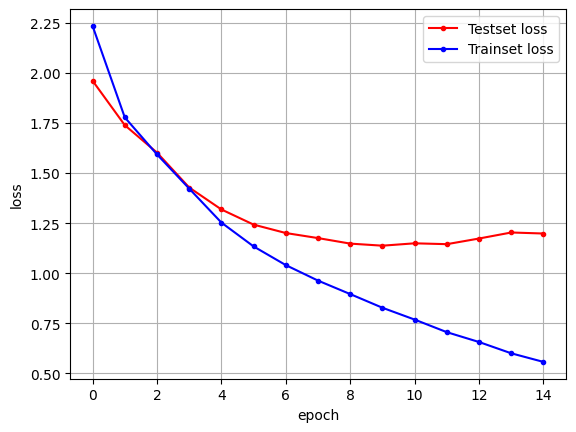

In [24]:
# 전체 코드
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import reuters
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)

# 데이터 확인
category = np.max(y_train) + 1 # 카테고리는 0부터 존재하므로
print(f'카테고리 수 : {category}')
print(f'학습용 뉴스 기사 수 : {len(X_train)}')
print(f'테스트용 뉴스 기사 수 : {len(X_test)}')
print(X_train[0])

# 단어 길이 맞추기
X_train = sequence.pad_sequences(X_train, maxlen=100)
X_test = sequence.pad_sequences(X_test, maxlen=100)

# 원-핫 인코딩
y_train = to_categorical(y_train) # 46개의 카테고리 이므로, 원-핫 인코딩된 벡터의 길이는 46(길이는 알아서 맞춰주는 듯?)
y_test = to_categorical(y_test)

# 모델 구조 설정
model = Sequential()
model.add(Embedding(1000, 100))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))

# 모델 실행 옵션 설정
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 학습 조기 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

# 모델 실행
history = model.fit(X_train, y_train, epochs=200, batch_size=20, validation_data=(X_test, y_test), callbacks=[early_stopping_callback])

# 테스트 정확도 출력
print(f'Test Accuracy : {model.evaluate(X_test, y_test)[1]}')

# 학습 결과 그래프화
# 1. 검증셋, 학습셋 오차 저장
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 2. 그래프화
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset loss')

# 3. 그래프 그리드 + 레이블
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## LSTM과 CNN의 조합을 이용한 영화 리뷰 분류

사용할 데이터셋 : 인터넷 영화 데이터베이스(영화 관련 정보, 출연진 정보, 개봉 정보, 영화 후기, 평점)

25,000개의 영화 리뷰

평가 : 긍정 or 부정 -> 원-핫 인코딩 과정 필요 x

로이터 뉴스 데이터와 마찬가지로 각 단어에 대한 전처리 마친 상태

데이터셋에서 나타나는 빈도에 따라 번호가 정해지므로 빈도 높은 데이터 불러와 학습 가능

Epoch 1/100
469/469 [==============================] - 116s 243ms/step - loss: 0.4073 - accuracy: 0.8008 - val_loss: 0.3176 - val_accuracy: 0.8694
Epoch 2/100
469/469 [==============================] - 109s 232ms/step - loss: 0.2314 - accuracy: 0.9112 - val_loss: 0.2884 - val_accuracy: 0.8768
Epoch 3/100
469/469 [==============================] - 114s 243ms/step - loss: 0.1871 - accuracy: 0.9306 - val_loss: 0.2641 - val_accuracy: 0.8947
Epoch 4/100
469/469 [==============================] - 144s 307ms/step - loss: 0.1552 - accuracy: 0.9437 - val_loss: 0.2903 - val_accuracy: 0.8931
Epoch 5/100
469/469 [==============================] - 146s 310ms/step - loss: 0.1185 - accuracy: 0.9588 - val_loss: 0.3035 - val_accuracy: 0.8907
Epoch 6/100
782/782 [==============================] - 35s 44ms/step - loss: 0.3530 - accuracy: 0.8758
Test Accuracy : 0.875760018825531


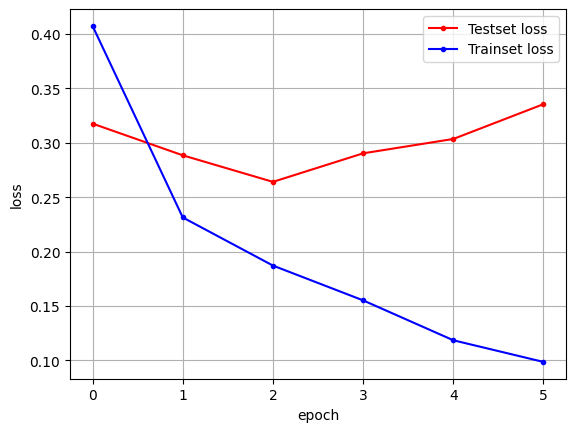

In [26]:
# 전체 코드
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Embedding, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt

# 데이터 불러와 학습용, 테스트용 분류
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=5000)

# 단어 길이 맞추기
X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)

# 모델 구조 설정
model = Sequential()
model.add(Embedding(5000, 100))
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))

# 모델 실행 옵션 설정
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 학습 조기 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)

# 모델 실행
history = model.fit(X_train, y_train, batch_size=40, epochs=100, validation_split=0.25, callbacks=[early_stopping_callback])

# 테스트 정확도 출력
print(f'Test Accuracy : {model.evaluate(X_test, y_test)[1]}')

# 결과 그래프화
# 1. 검증셋, 학습셋 오차 저장
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 2. 그래프화
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset loss')

# 3. 그리드 + 레이블 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 어텐션(Attention)을 사용한 신경망

In [28]:
!pip install attention

Epoch 1/100
625/625 [==============================] - 917s 1s/step - loss: 0.3727 - accuracy: 0.8294 - val_loss: 0.2725 - val_accuracy: 0.8885
Epoch 2/100
625/625 [==============================] - 936s 1s/step - loss: 0.2220 - accuracy: 0.9124 - val_loss: 0.3177 - val_accuracy: 0.8732
Epoch 3/100
625/625 [==============================] - 950s 2s/step - loss: 0.1643 - accuracy: 0.9368 - val_loss: 0.2975 - val_accuracy: 0.8873
Epoch 4/100
782/782 [==============================] - 193s 246ms/step - loss: 0.3342 - accuracy: 0.8890
Test Accuracy : 0.8889999985694885


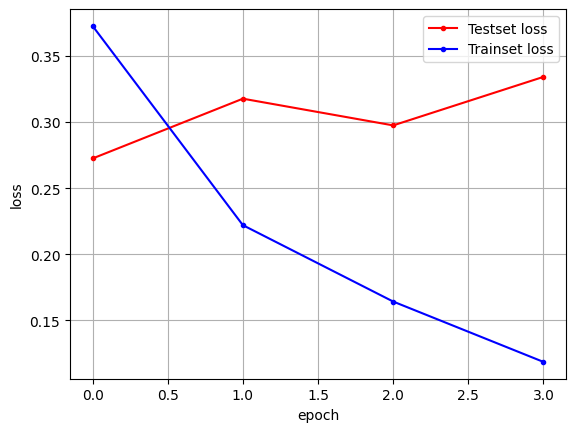

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Embedding, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import EarlyStopping
from attention import Attention

import numpy as np
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=5000)

X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)

model = Sequential()
model.add(Embedding(5000, 500))
model.add(Dropout(0.5))
model.add(LSTM(64, return_sequences=True))
model.add(Attention())
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(X_train, y_train, batch_size=40, epochs=100, validation_data=(X_test, y_test), callbacks=[early_stopping_callback])

print(f'Test Accuracy : {model.evaluate(X_test, y_test)[1]}')

y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()